## NYC_Energy_Consumption Demand Prediction Using Pycaret

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2014-08,237.2868,119418.7769,0.0364,0.0373,0.7599
1,2015-08,437.0982,264919.0783,0.0687,0.0693,0.6856
Mean,nan,337.1925,192168.9276,0.0525,0.0533,0.7227
SD,nan,99.9057,72750.1507,0.0162,0.0160,0.0371


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,EnsembleForecaster,226.9474,255.1535,0.0395,0.0386,0.8593


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


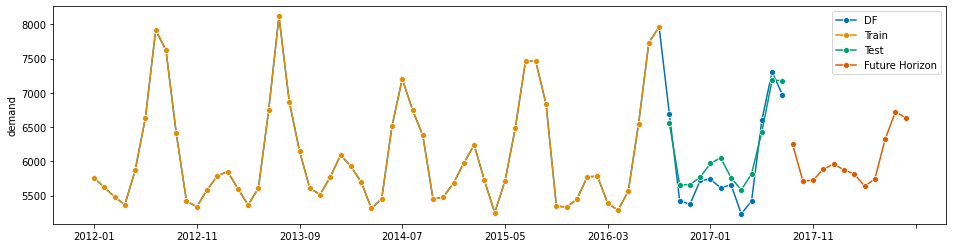

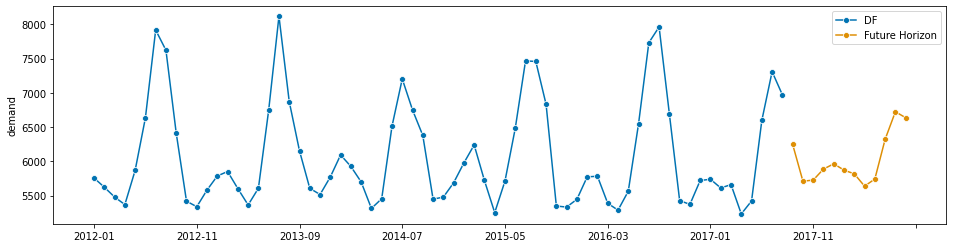

In [2]:
# Import libraries
from pycaret.datasets import get_data
import pandas as pd
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series


# Load and prepare data 
data = pd.read_csv('nyc_energy_consumption.csv')
data= data.drop(columns= ['temp','precip'], axis = 1)
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

data=data.resample('M').mean() # resampled the data to Monthly 

df  = pd.Series(data['demand'])

# Setup Experiment 
# we are setting up the the forecast horizon of 12 months to look into months ahead 
# with cross validation of 2 folds
# forecast horizon, cross-validation folds, etc.)
exp = TimeSeriesExperiment()
exp.setup(data=df, fh=12, fold=2, session_id=786)

# Compare multiple models and then select best based on the n_Select specified)
# After selection we will fine tune these models and then blend them together 
# based on the method in our case its mean

compare_models = exp.compare_models(n_select=3)
tuned_models = [exp.tune_model(model) for model in compare_models]
ensemble_models = exp.blend_models(tuned_models, method='mean')

# Now we are ready to make prediction on the test dataset we have holded out
df_pred = exp.predict_model(ensemble_models)

# After chekcing the model accuracy we proceed towards the finalization
final_model = exp.finalize_model(ensemble_models)

# Future Predictions
df_pred_future = exp.predict_model(final_model, verbose=False)

# Plot Results
y_train = exp.get_config("y_train")
_ = plot_series(df, y_train, df_pred[0], df_pred_future[0], labels=['DF', 'Train', 'Test ', 'Future Horizon'])

# Save Model
_ = exp.save_model(final_model, 'NYC Energy Consumption', model_only=True)

# Load Model 
loaded_model = exp.load_model('NYC Energy Consumption')

# Predict using the loaded model
y_pred_future = exp.predict_model(loaded_model, verbose=False)
_ = plot_series(df, df_pred_future[0], labels=['DF', 'Future Horizon'])